Reference
https://towardsdatascience.com/free-stock-data-for-python-using-yahoo-finance-api-9dafd96cad2e

In [1]:
# !pip install pandas-datareader

In [2]:
# !pip install yfinance
# !pip install matplotlib
# !pip install seaborn

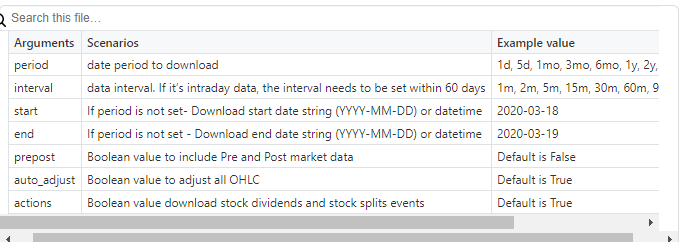

In [3]:
from IPython.display import Image
Image(filename='2021-03-05_17h03_49.png') 

- Thai SETI  www.investing.com
- Vietnam VNI www.investing.com

Asean
- Singapore ^STI
- Malaysia ^KLSE
- Indonesia ^JKSE
- Philippines PSEI.PS

Asia
- Hong Kong ^HSI
- China 399001.SZ
- South Korea ^KS11
- Japan ^N225
- Australia ^AORD
- New Zealand ^NZ50
- Taiwan ^TWII
- BSE SENSEX India ^BSESN
- India ^NSEI

Western
- USA ^DJI
- USA NY ^NYA
- USA AMEX ^XAX
- USA Chicago ^RUT
- USA Toronto ^GSPTSE
- GB ^FTSE
- German  ^GDAXI
- Paris ^FCHI
- Zurich ^STOXX50E
- Brussels ^BFX
- Russia IMOEX.ME
- Sao Paolo(Brazilian) ^BVSP
- Mexico ^MXX
- Santiago(Chile) ^IPSA
- Buenos Aires(Argentina) ^MERV
- Tel Aviv(Israel) ^TA125.TA
- Egyptian ^CASE30
- Johannesburg(South Africa)  ^JN0U.JO

-Other
- Gold GC=F
- Crude Oil CL=F
- Bitcoin USD BTC-USD

# Get stock value one by one

In [5]:
import yfinance as yf
tricker = "^DJI"
stockData = yf.Ticker(tricker)

# get stock info
print(stockData.info)

start ="2010-01-01"
end ="2020-12-31"
# get historical market data
hist = stockData.history(start=start, end=end)
hist.head()

# hist.info()

{'previousClose': 33153.21, 'regularMarketOpen': 33222.38, 'twoHundredDayAverage': 30096.816, 'trailingAnnualDividendYield': None, 'payoutRatio': None, 'volume24Hr': None, 'regularMarketDayHigh': 33617.95, 'navPrice': None, 'averageDailyVolume10Day': 353462000, 'totalAssets': None, 'regularMarketPreviousClose': 33153.21, 'fiftyDayAverage': 32158.11, 'trailingAnnualDividendRate': None, 'open': 33222.38, 'toCurrency': None, 'averageVolume10days': 353462000, 'expireDate': None, 'yield': None, 'algorithm': None, 'dividendRate': None, 'exDividendDate': None, 'beta': None, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 33222.38, 'priceHint': 2, 'currency': 'USD', 'regularMarketVolume': 188317632, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': None, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 400116721, 'priceToSalesTrailing12Months': None, 'dayLow': 33222.38, 'ask': 33552.26, 'ytdReturn': None, 'askSize': 0, 'volume': 18

'Dow Jones Industrial Average'

In [5]:
# Save data 
data_df = yf.download(tricker, start=start, end=end)
data_df.to_csv(tricker+'.csv')

[*********************100%***********************]  1 of 1 completed


# Get all stock price in Datafram 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3531 entries, 2009-12-24 to 2020-12-31
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SET                              2684 non-null   float64
 1   VNI                              2745 non-null   float64
 2   STI Index                        2744 non-null   float64
 3   FTSE Bursa Malaysia KLCI         2699 non-null   float64
 4   Composite Index                  2683 non-null   float64
 5   PSEi INDEX                       2676 non-null   float64
 6   HANG SENG INDEX                  2707 non-null   float64
 7   Shenzhen Component               2674 non-null   float64
 8   KOSPI Composite Index            2710 non-null   float64
 9   Nikkei 225                       2696 non-null   float64
 10  ALL ORDINARIES                   2780 non-null   float64
 11  S&P/NZX 50 INDEX GROSS ( GROSS   2686 non-null   float64
 12  TS

<AxesSubplot:xlabel='Date'>

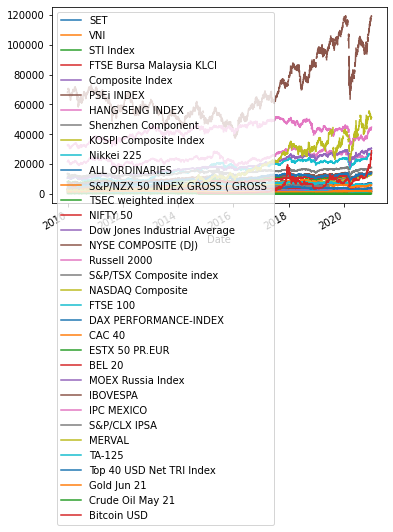

In [1]:
import yfinance as yf
import pandas as pd

df_trickers = pd.read_csv("StockIndexTrickers.csv")
# print(df_trickers.head())
# df_trickers.info()

start ="2009-12-25"
# start ="2010-01-01"
end ="2020-12-31"

stockDataList = []

trickers = df_trickers[df_trickers["FromYahoo"]==1][["Trickers","Stock Index"]]
# trickers
                                  
for index, row in trickers.iterrows():
    stockData = yf.Ticker(row["Trickers"])
    histData = stockData.history(start=start, end=end)
    dataFrame = pd.DataFrame(histData["Close"])
    dataFrame.columns =[stockData.info['shortName']]
    stockDataList.append(dataFrame)
    
stockThai = pd.read_csv("SET Index Historical Data.csv")
stockThai['Date'] = pd.to_datetime(stockThai['Date'])
stockThai = stockThai.set_index('Date')
df_stockThai = pd.DataFrame(stockThai['Close'].str.replace(',','').astype(float))
df_stockThai.columns =['SET']

stockVietnam = pd.read_csv("VN Historical Data.csv")
stockVietnam['Date'] = pd.to_datetime(stockVietnam['Date'])
stockVietnam = stockVietnam.set_index('Date')
df_stockVietnam = pd.DataFrame(stockVietnam['Close'].str.replace(',','').astype(float))
df_stockVietnam.columns =["VNI"]

df_allStocks = pd.merge(df_stockThai, df_stockVietnam, how= "outer",left_index=True, right_index=True)

for i in range(len(stockDataList)):
    df_allStocks = pd.merge(df_allStocks, stockDataList[i], how= "outer",left_index=True, right_index=True)
    
df_allStocks.info()
df_allStocks.plot()

In [2]:
print(df_allStocks.isnull().sum())

SET                                 847
VNI                                 786
STI Index                           787
FTSE Bursa Malaysia KLCI            832
Composite Index                     848
PSEi INDEX                          855
HANG SENG INDEX                     824
Shenzhen Component                  857
KOSPI Composite Index               821
Nikkei 225                          835
ALL ORDINARIES                      751
S&P/NZX 50 INDEX GROSS ( GROSS      845
TSEC weighted index                 832
NIFTY 50                            838
Dow Jones Industrial Average        758
NYSE COMPOSITE (DJ)                 758
Russell 2000                        758
S&P/TSX Composite index             768
NASDAQ Composite                    758
FTSE 100                            758
DAX PERFORMANCE-INDEX               743
CAC 40                              717
ESTX 50 PR.EUR                      772
BEL 20                              718
MOEX Russia Index                  1604


In [5]:
df_allStocks = df_allStocks.ffill()

In [6]:
df_allStocks.isnull().sum()

SET                                   6
VNI                                   6
STI Index                             2
FTSE Bursa Malaysia KLCI              2
Composite Index                       2
PSEi INDEX                            2
HANG SENG INDEX                       2
Shenzhen Component                    1
KOSPI Composite Index                 2
Nikkei 225                            1
ALL ORDINARIES                        3
S&P/NZX 50 INDEX GROSS ( GROSS        3
TSEC weighted index                   1
NIFTY 50                              6
Dow Jones Industrial Average          0
NYSE COMPOSITE (DJ)                   0
Russell 2000                          0
S&P/TSX Composite index               0
NASDAQ Composite                      0
FTSE 100                              3
DAX PERFORMANCE-INDEX                 2
CAC 40                                0
ESTX 50 PR.EUR                        0
BEL 20                                0
MOEX Russia Index                   832


In [9]:
start2 ="2010-01-01"
end2 ="2020-12-31"
df_allStocks = df_allStocks.loc[start2:end2]

In [10]:
# Save data 
df_allStocks.to_csv('StocksData(Closing Price).csv')